1.Import Neccessary Packge

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2. Basic Understanding Of The Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2.1 Loading The Dataset

In [3]:
file1=pd.read_csv("/content/drive/MyDrive/Uidai Datset/api_data_aadhar_biometric_0_500000.csv")
file2=pd.read_csv("/content/drive/MyDrive/Uidai Datset/api_data_aadhar_biometric_500000_1000000.csv")
file3=pd.read_csv("/content/drive/MyDrive/Uidai Datset/api_data_aadhar_biometric_1000000_1500000.csv")
file4=pd.read_csv("/content/drive/MyDrive/Uidai Datset/api_data_aadhar_biometric_1500000_1861108.csv")

In [4]:
df=pd.concat([file1,file2,file3,file4],axis=0,ignore_index=True)
df

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815
...,...,...,...,...,...,...
1861103,29-12-2025,West Bengal,Uttar Dinajpur,733201,4,9
1861104,29-12-2025,West Bengal,Uttar Dinajpur,733213,0,1
1861105,29-12-2025,West Bengal,West Midnapore,721304,0,3
1861106,29-12-2025,West Bengal,West Midnapore,721451,2,0


2.2 How many No of Rows and Columns prseent

In [5]:
df.shape

(1861108, 6)

2.3 Number of Category and Numerical Features

In [6]:
categorical_features = df.select_dtypes(include='object').columns.tolist()
numerical_features = df.select_dtypes(include=['int64']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['date', 'state', 'district']
Numerical Features: ['pincode', 'bio_age_5_17', 'bio_age_17_']


2.4 No of NaN values

In [7]:
df.isnull().sum()

,0
date,0
state,0
district,0
pincode,0
bio_age_5_17,0
bio_age_17_,0


2.5 No of Unique value in each Columns

In [8]:
def unique(df,col):
  print("No of Unique Value in ",col,"is",df[col].nunique())

In [9]:
for i in df.columns:
  unique(df,i)

No of Unique Value in  date is 89
No of Unique Value in  state is 57
No of Unique Value in  district is 974
No of Unique Value in  pincode is 19707
No of Unique Value in  bio_age_5_17 is 2121
No of Unique Value in  bio_age_17_ is 2212


2.6 No of Duplicate Value

In [10]:
df.duplicated().sum()

np.int64(94896)

## Conclusion :



*   There are 1861108 rows and 6 Columns
*   No of Category Feature are 3 and Numeric Feature are 4


*   There is No any NaN value is found
*   There 94896 Duplicate Data





# 3. Data Preprocessing

3.1 Data Type Validation



*   Checking Whether all the Date in The format of 'DD-MM-YYYY'
*   Creating Separate column for day,Month and Year






In [11]:
initial_date_type = df['date'].dtype
df['date_checked'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

invalid_dates_count = df['date_checked'].isnull().sum()

print(f"Initial 'date' column dtype: {initial_date_type}")

if invalid_dates_count == 0:
    print("All dates in the 'date' column are in 'dd-mm-yyyy' format.")
else:
    print(f"Found {invalid_dates_count} dates not in 'dd-mm-yyyy' format. (Out of {len(df)} total dates)")
    print("Rows with invalid date format:")
    display(df[df['date_checked'].isnull()])

df['date']=df['date_checked']
df = df.drop(columns=['date_checked'])


Initial 'date' column dtype: object
All dates in the 'date' column are in 'dd-mm-yyyy' format.


In [12]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

print("DataFrame after extracting day, month, year :")
display(df.head())

DataFrame after extracting day, month, year :


,date,state,district,pincode,bio_age_5_17,bio_age_17_,day,month,year
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,1,3,2025
1,2025-03-01,Bihar,Madhepura,852121,144,369,1,3,2025
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091,1,3,2025
3,2025-03-01,Bihar,Bhojpur,802158,256,980,1,3,2025
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815,1,3,2025





*   Correcting and Removing Wrong State names



In [13]:
df['state'].unique()

array(['Haryana', 'Bihar', 'Jammu and Kashmir', 'Tamil Nadu',
       'Maharashtra', 'Gujarat', 'Odisha', 'West Bengal', 'Kerala',
       'Rajasthan', 'Punjab', 'Himachal Pradesh', 'Uttar Pradesh',
       'Assam', 'Uttarakhand', 'Madhya Pradesh', 'Karnataka',
       'Andhra Pradesh', 'Telangana', 'Goa', 'Nagaland', 'Jharkhand',
       'Delhi', 'Chhattisgarh', 'Meghalaya', 'Chandigarh', 'Orissa',
       'Puducherry', 'Pondicherry', 'Manipur', 'Sikkim', 'Tripura',
       'Mizoram', 'Arunachal Pradesh', 'Ladakh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman and Diu',
       'Andaman and Nicobar Islands', 'Andaman & Nicobar Islands',
       'Dadra and Nagar Haveli', 'Lakshadweep', 'Daman & Diu',
       'Dadra & Nagar Haveli', 'Jammu & Kashmir', 'WESTBENGAL',
       'andhra pradesh', 'Westbengal', 'West  Bengal', 'WEST BENGAL',
       'West Bangal', 'ODISHA', 'odisha', 'West bengal', 'west Bengal',
       'Uttaranchal', 'Chhatisgarh', 'Tamilnadu'], dtype=object)

In [14]:
state_correction = {
    # Already correct
    'Haryana': 'Haryana',
    'Bihar': 'Bihar',
    'Tamil Nadu': 'Tamil Nadu',
    'Maharashtra': 'Maharashtra',
    'Gujarat': 'Gujarat',
    'Odisha': 'Odisha',
    'West Bengal': 'West Bengal',
    'Kerala': 'Kerala',
    'Rajasthan': 'Rajasthan',
    'Punjab': 'Punjab',
    'Himachal Pradesh': 'Himachal Pradesh',
    'Uttar Pradesh': 'Uttar Pradesh',
    'Assam': 'Assam',
    'Uttarakhand': 'Uttarakhand',
    'Madhya Pradesh': 'Madhya Pradesh',
    'Karnataka': 'Karnataka',
    'Andhra Pradesh': 'Andhra Pradesh',
    'Telangana': 'Telangana',
    'Goa': 'Goa',
    'Nagaland': 'Nagaland',
    'Jharkhand': 'Jharkhand',
    'Delhi': 'Delhi',
    'Chhattisgarh': 'Chhattisgarh',
    'Meghalaya': 'Meghalaya',
    'Chandigarh': 'Chandigarh',
    'Manipur': 'Manipur',
    'Sikkim': 'Sikkim',
    'Tripura': 'Tripura',
    'Mizoram': 'Mizoram',
    'Arunachal Pradesh': 'Arunachal Pradesh',
    'Ladakh': 'Ladakh',
    'Lakshadweep': 'Lakshadweep',

    # Jammu & Kashmir variants
    'Jammu and Kashmir': 'Jammu and Kashmir',
    'Jammu & Kashmir': 'Jammu and Kashmir',

    # Odisha variants
    'Orissa': 'Odisha',
    'ODISHA': 'Odisha',
    'odisha': 'Odisha',

    # West Bengal variants
    'WESTBENGAL': 'West Bengal',
    'Westbengal': 'West Bengal',
    'West  Bengal': 'West Bengal',
    'WEST BENGAL': 'West Bengal',
    'West Bangal': 'West Bengal',
    'West bengal': 'West Bengal',
    'west Bengal': 'West Bengal',

    # Andhra Pradesh variants
    'andhra pradesh': 'Andhra Pradesh',

    # Tamil Nadu variants
    'Tamilnadu': 'Tamil Nadu',

    # Uttarakhand old name
    'Uttaranchal': 'Uttarakhand',

    # Chhattisgarh misspelling
    'Chhatisgarh': 'Chhattisgarh',

    # Puducherry variants
    'Puducherry': 'Puducherry',
    'Pondicherry': 'Puducherry',

    # UT merger variants
    'Daman and Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra and Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra and Nagar Haveli and Daman and Diu': 'Dadra and Nagar Haveli and Daman and Diu',

    # Andaman variants
    'Andaman and Nicobar Islands': 'Andaman and Nicobar Islands',
    'Andaman & Nicobar Islands': 'Andaman and Nicobar Islands'
}


In [15]:
df['state'] = df['state'].replace(state_correction)


In [16]:
df['state'].unique()

array(['Haryana', 'Bihar', 'Jammu and Kashmir', 'Tamil Nadu',
       'Maharashtra', 'Gujarat', 'Odisha', 'West Bengal', 'Kerala',
       'Rajasthan', 'Punjab', 'Himachal Pradesh', 'Uttar Pradesh',
       'Assam', 'Uttarakhand', 'Madhya Pradesh', 'Karnataka',
       'Andhra Pradesh', 'Telangana', 'Goa', 'Nagaland', 'Jharkhand',
       'Delhi', 'Chhattisgarh', 'Meghalaya', 'Chandigarh', 'Puducherry',
       'Manipur', 'Sikkim', 'Tripura', 'Mizoram', 'Arunachal Pradesh',
       'Ladakh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Andaman and Nicobar Islands', 'Lakshadweep'], dtype=object)

3.2 Column Name Standarization


*   Already Standarized that is every name is in lower case and underscore is used to sperated two words



In [17]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_',
       'day', 'month', 'year'],
      dtype='object')

3.3 Find Missing value and Handling it



*   No any Missing Value


3.4 Duplicate Values

In [18]:
df.duplicated(keep=False).sum()

np.int64(190814)

In [19]:
exact_duplicates = df[df.duplicated(keep=False)]
exact_duplicates.head(10)

,date,state,district,pincode,bio_age_5_17,bio_age_17_,day,month,year
109994,2025-09-01,Chhattisgarh,Kondagaon,494229,0,1,1,9,2025
109995,2025-09-01,Chhattisgarh,Kondagaon,494230,1,0,1,9,2025
109996,2025-09-01,Chhattisgarh,Korba,495119,5,35,1,9,2025
109997,2025-09-01,Chhattisgarh,Korba,495446,0,16,1,9,2025
109998,2025-09-01,Chhattisgarh,Korba,495674,10,34,1,9,2025
109999,2025-09-01,Chhattisgarh,Korba,495683,0,3,1,9,2025
110000,2025-09-01,Chhattisgarh,Kondagaon,494229,0,1,1,9,2025
110001,2025-09-01,Chhattisgarh,Kondagaon,494230,1,0,1,9,2025
110002,2025-09-01,Chhattisgarh,Korba,495119,5,35,1,9,2025
110003,2025-09-01,Chhattisgarh,Korba,495446,0,16,1,9,2025


In [20]:
df= df.drop_duplicates(keep="first")
df.duplicated(keep=False).sum()

np.int64(0)

In [21]:
df.shape

(1765681, 9)

# 4. Exploratory Data Analysis

*   We are Categorising The state and union terriorist based on geographical region



In [22]:
india_region_map = {
    "North": [
        "Delhi",
        "Haryana",
        "Punjab",
        "Himachal Pradesh",
        "Jammu and Kashmir",
        "Ladakh",
        "Chandigarh",
        "Rajasthan"
    ],

    "South": [
        "Tamil Nadu",
        "Kerala",
        "Karnataka",
        "Andhra Pradesh",
        "Telangana",
        "Puducherry"
    ],

    "East": [
        "West Bengal",
        "Bihar",
        "Odisha",
        "Jharkhand"
    ],

    "West": [
        "Maharashtra",
        "Gujarat",
        "Goa",
        "Dadra and Nagar Haveli and Daman and Diu",
        "Dadra And Nagar Haveli"
    ],

    "Central": [
        "Madhya Pradesh",
        "Chhattisgarh",
        "Uttar Pradesh",
        "Uttarakhand"
    ],

    "North-East": [
        "Assam",
        "Meghalaya",
        "Manipur",
        "Mizoram",
        "Nagaland",
        "Tripura",
        "Arunachal Pradesh",
        "Sikkim"
    ],

    "Islands": [
        "Andaman and Nicobar Islands",
        "Lakshadweep"
    ]

}


In [23]:
def get_region(state, region_map):
    for region, states_list in region_map.items():
        if state in states_list:
            return region
    return 'Unknown Region'

df['geographical'] = df['state'].apply(lambda x: get_region(x, india_region_map))
display(df.head())

,date,state,district,pincode,bio_age_5_17,bio_age_17_,day,month,year,geographical
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,1,3,2025,North
1,2025-03-01,Bihar,Madhepura,852121,144,369,1,3,2025,East
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091,1,3,2025,North
3,2025-03-01,Bihar,Bhojpur,802158,256,980,1,3,2025,East
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815,1,3,2025,South


In [24]:
df.columns

Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_',
       'day', 'month', 'year', 'geographical'],
      dtype='object')

## 4.1 Bar Chart : Total Bio Age by Geographical Region

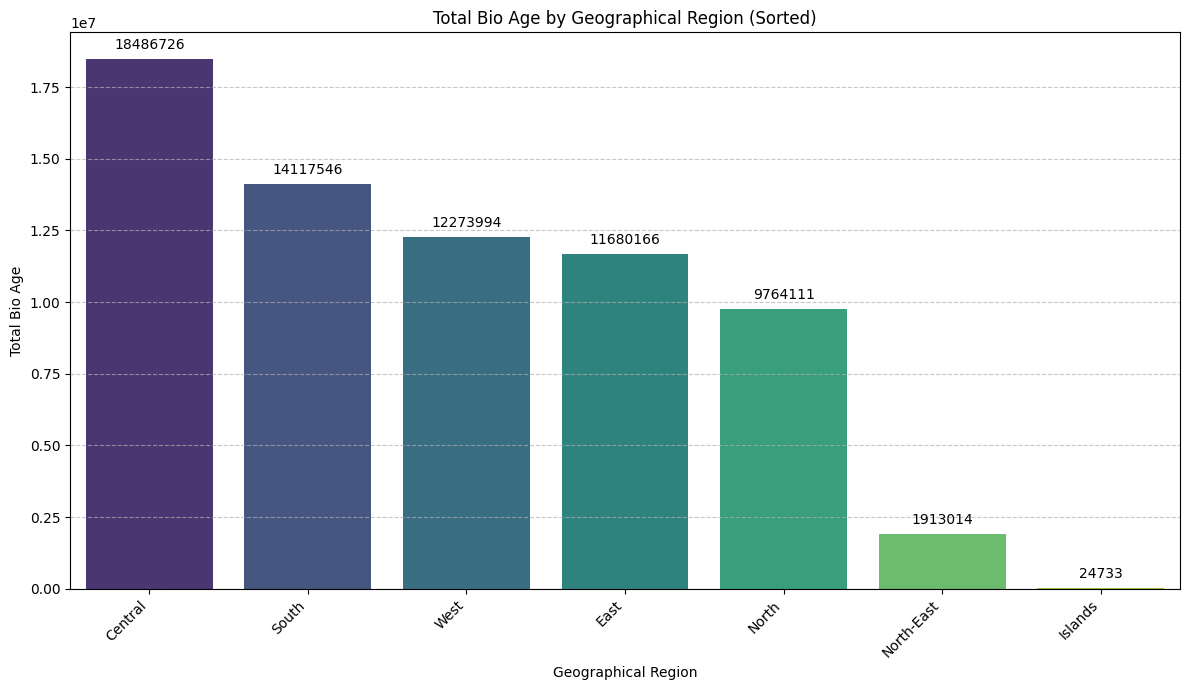

In [25]:
df['total_bio_age'] = df['bio_age_5_17'] + df['bio_age_17_']

region_bio_age = df.groupby('geographical')['total_bio_age'].sum().reset_index()


region_bio_age = region_bio_age.sort_values(by='total_bio_age', ascending=False)

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='geographical', y='total_bio_age', data=region_bio_age, palette='viridis', hue='geographical', legend=False)
plt.title('Total Bio Age by Geographical Region (Sorted)')
plt.xlabel('Geographical Region')
plt.ylabel('Total Bio Age')
plt.xticks(rotation=45, ha='right')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4.2 Stacked Bar Chart : Total Biometric Updates by Zone Wise and Age Group

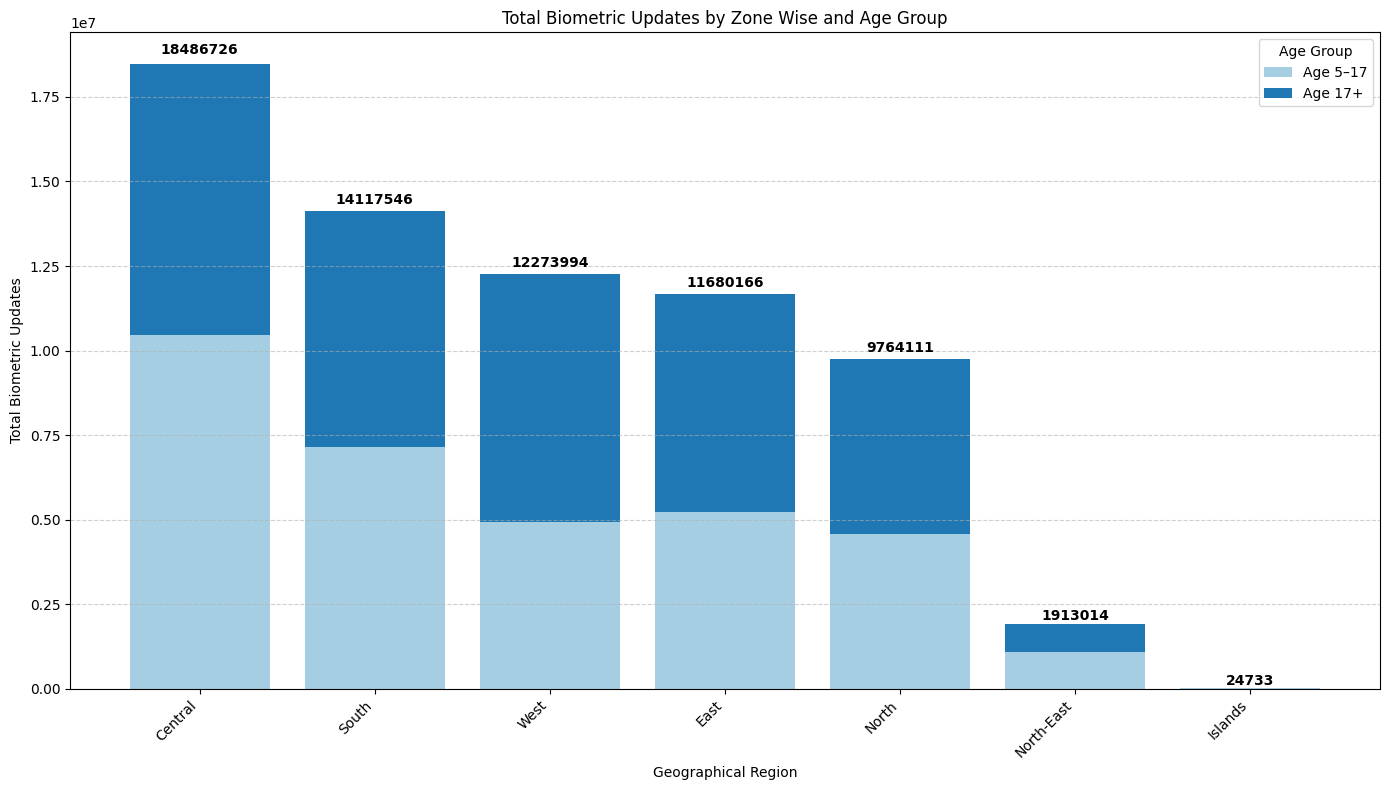

In [26]:
import matplotlib.pyplot as plt
import numpy as np


region_bio_age = df.groupby('geographical')[['bio_age_5_17', 'bio_age_17_']].sum()


region_bio_age['total'] = region_bio_age.sum(axis=1)
region_bio_age = region_bio_age.sort_values('total', ascending=False)


regions = region_bio_age.index
age_5_17 = region_bio_age['bio_age_5_17']
age_17_plus = region_bio_age['bio_age_17_']

x = np.arange(len(regions))

plt.figure(figsize=(14, 8))


plt.bar(x, age_5_17, label='Age 5–17', color=plt.cm.Paired(0))
plt.bar(x, age_17_plus, bottom=age_5_17, label='Age 17+', color=plt.cm.Paired(1))


for i, total in enumerate(region_bio_age['total']):
    plt.text(i, total + total * 0.01, f'{int(total)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')


plt.xticks(x, regions, rotation=45, ha='right')
plt.xlabel('Geographical Region')
plt.ylabel('Total Biometric Updates')
plt.title('Total Biometric Updates by Zone Wise and Age Group')
plt.legend(title='Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

## 4.3 Bar Chart : Total Bio Age 5-17 by Geographical Region

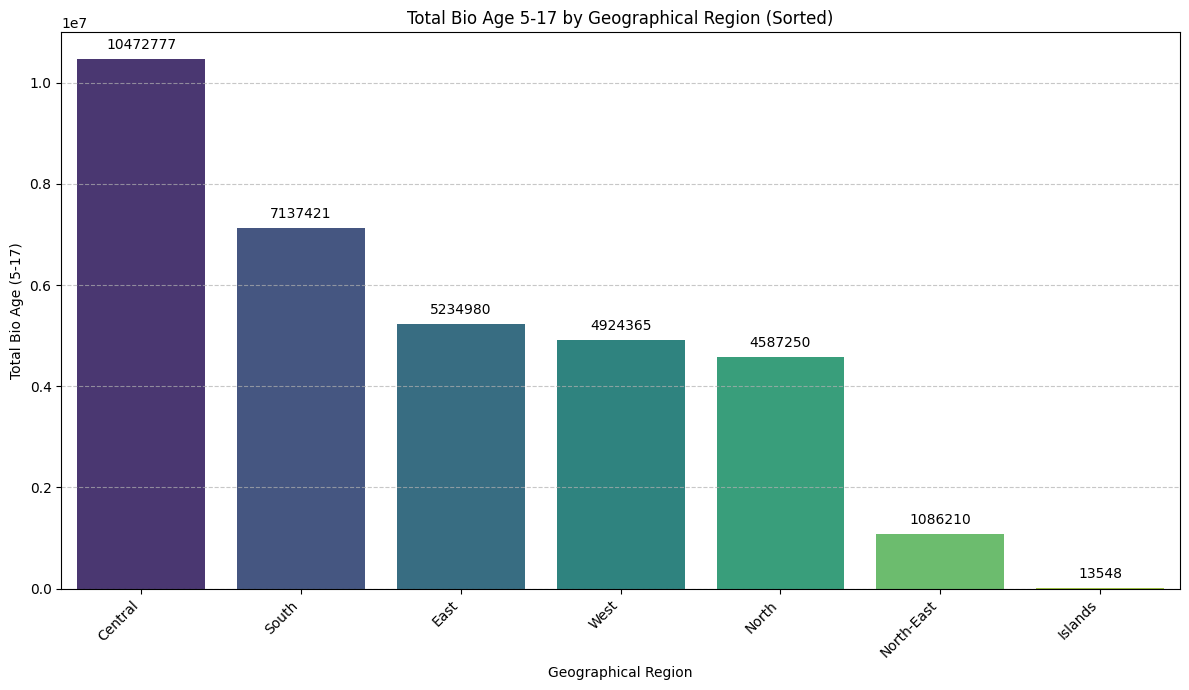

In [27]:
region_bio_age_5_17 = df.groupby('geographical')['bio_age_5_17'].sum().reset_index()


region_bio_age_5_17 = region_bio_age_5_17.sort_values(by='bio_age_5_17', ascending=False)

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='geographical', y='bio_age_5_17', data=region_bio_age_5_17, palette='viridis', hue='geographical', legend=False)
plt.title('Total Bio Age 5-17 by Geographical Region (Sorted)')
plt.xlabel('Geographical Region')
plt.ylabel('Total Bio Age (5-17)')
plt.xticks(rotation=45, ha='right')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4.4 Bar Chart : Total Bio Age 17+ by Geographical Region

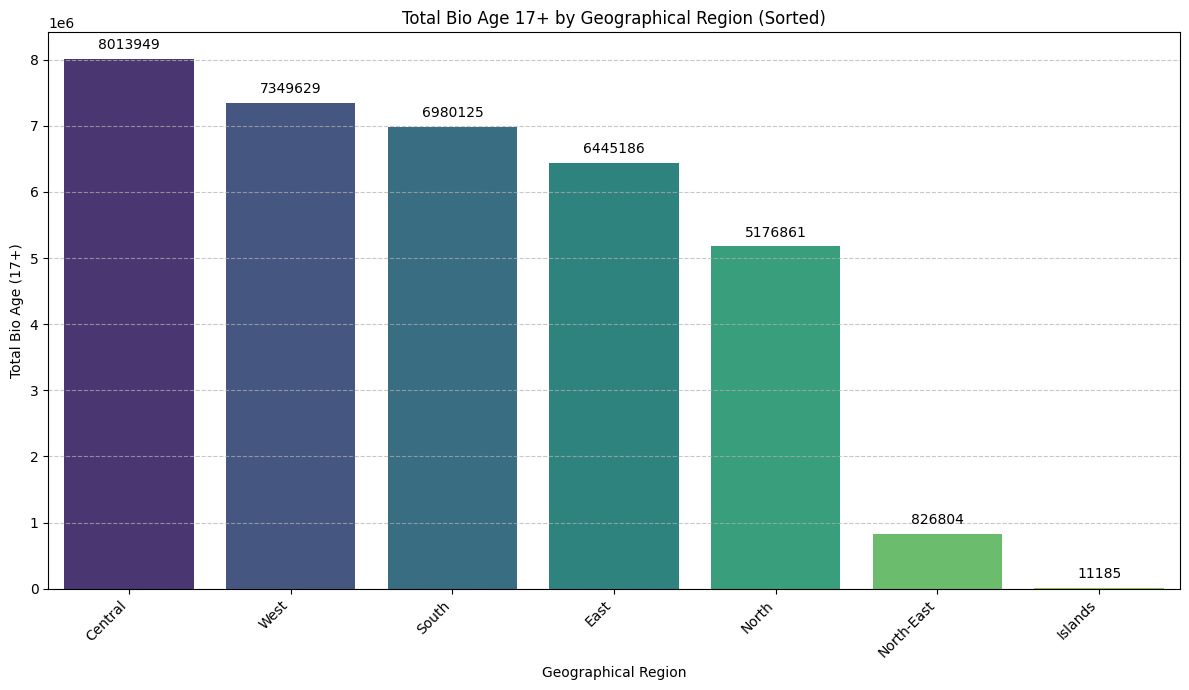

In [28]:
region_bio_age_17 = df.groupby('geographical')['bio_age_17_'].sum().reset_index()


region_bio_age_17 = region_bio_age_17.sort_values(by='bio_age_17_', ascending=False)

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='geographical', y='bio_age_17_', data=region_bio_age_17, palette='viridis', hue='geographical', legend=False)
plt.title('Total Bio Age 17+ by Geographical Region (Sorted)')
plt.xlabel('Geographical Region')
plt.ylabel('Total Bio Age (17+)')
plt.xticks(rotation=45, ha='right')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4.5 Line Chart : Monthly Total Bio Age for Age Groups 5-17 and 17+

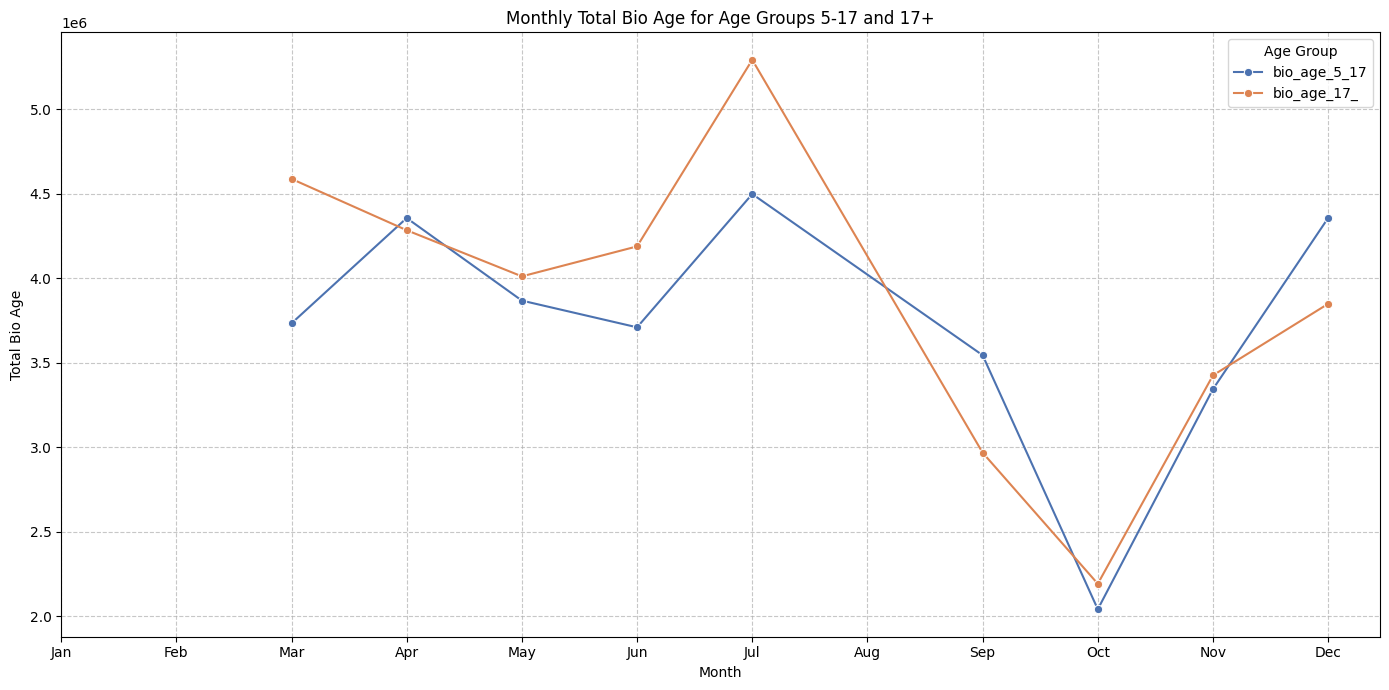

In [29]:
monthly_bio_age_groups = df.groupby('month')[['bio_age_5_17', 'bio_age_17_']].sum().reset_index()


monthly_bio_age_melted = monthly_bio_age_groups.melt(id_vars='month', var_name='Age Group', value_name='Total Bio Age')

plt.figure(figsize=(14, 7))
sns.lineplot(x='month', y='Total Bio Age', hue='Age Group', data=monthly_bio_age_melted, marker='o', palette='deep')
plt.title('Monthly Total Bio Age for Age Groups 5-17 and 17+')
plt.xlabel('Month')
plt.ylabel('Total Bio Age')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

## 4.6 pie Chart : Distribution of Bio Age 17+ by Geographical Region (Excluding Islands)

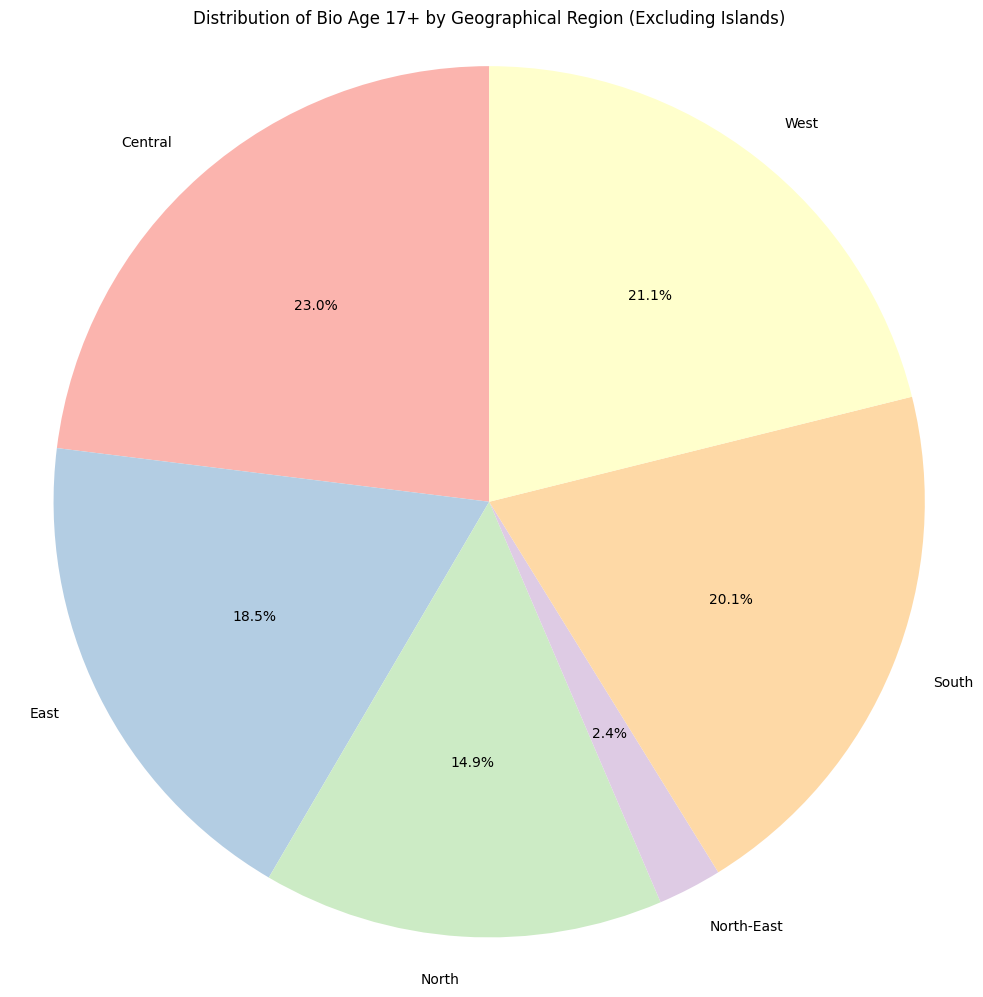

In [30]:
region_bio_age_17_pie = df.groupby('geographical')['bio_age_17_'].sum().reset_index()


region_bio_age_17_pie = region_bio_age_17_pie[region_bio_age_17_pie['geographical'] != 'Islands']


colors = sns.color_palette('Pastel1')[0:len(region_bio_age_17_pie)]

plt.figure(figsize=(10, 10))
plt.pie(region_bio_age_17_pie['bio_age_17_'], labels=region_bio_age_17_pie['geographical'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Bio Age 17+ by Geographical Region (Excluding Islands)')
plt.axis('equal')
plt.tight_layout()
plt.show()

## 4.7 Pie Chart : Distribution of Bio Age 5-17 by Geographical Region (Excluding Islands)

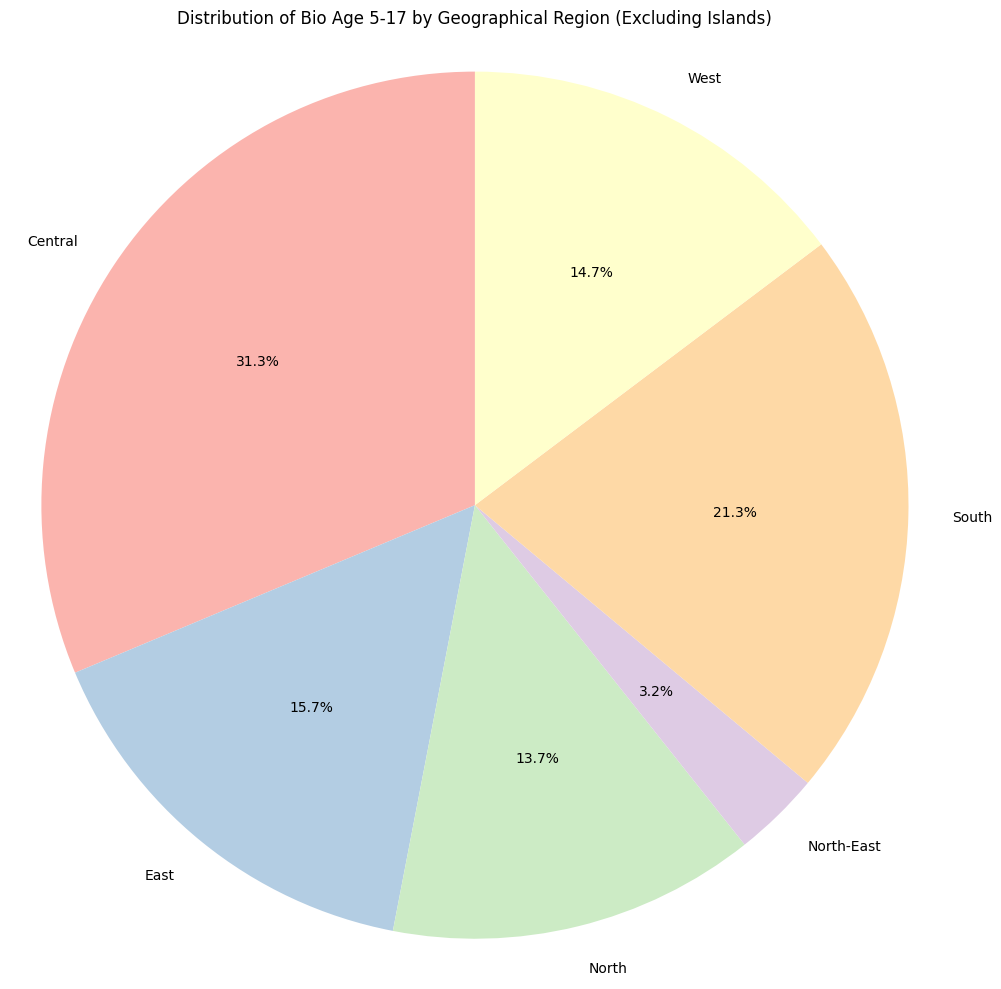

In [31]:
region_bio_age_5_17_pie = df.groupby('geographical')['bio_age_5_17'].sum().reset_index()


region_bio_age_5_17_pie = region_bio_age_5_17_pie[region_bio_age_5_17_pie['geographical'] != 'Islands']


colors = sns.color_palette('Pastel1')[0:len(region_bio_age_5_17_pie)]

plt.figure(figsize=(10, 10))
plt.pie(region_bio_age_5_17_pie['bio_age_5_17'], labels=region_bio_age_5_17_pie['geographical'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Bio Age 5-17 by Geographical Region (Excluding Islands)')
plt.axis('equal')
plt.tight_layout()
plt.show()

## 4.8 Circle Pie Chart : Share of Biometric Updates by Zone Wise

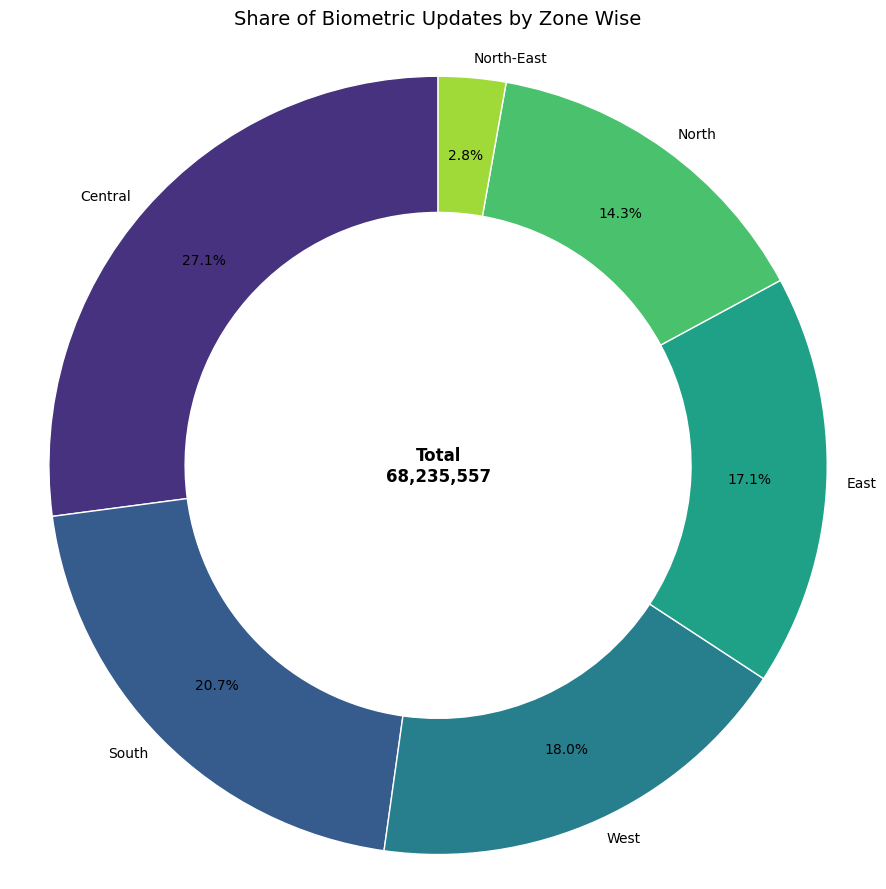

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


donut_data = region_bio_age[region_bio_age.index != 'Islands'].sort_values(
    by='total', ascending=False
)

plt.figure(figsize=(9, 9))


wedges, texts, autotexts = plt.pie(
    donut_data['total'],
    labels=donut_data.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.80,
    labeldistance=1.05,
    colors=sns.color_palette('viridis', len(donut_data)),
    wedgeprops=dict(width=0.35, edgecolor='white')
)


for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(10)


total = donut_data['total'].sum()
plt.text(
    0, 0,
    f'Total\n{total:,.0f}',
    ha='center', va='center',
    fontsize=12, fontweight='bold'
)

plt.title(
    'Share of Biometric Updates by Zone Wise',
    fontsize=14, pad=20
)

plt.axis('equal')
plt.tight_layout()
plt.show()

## 4.9 Stacked Area Chart : Monthly Enrollment by Age Category

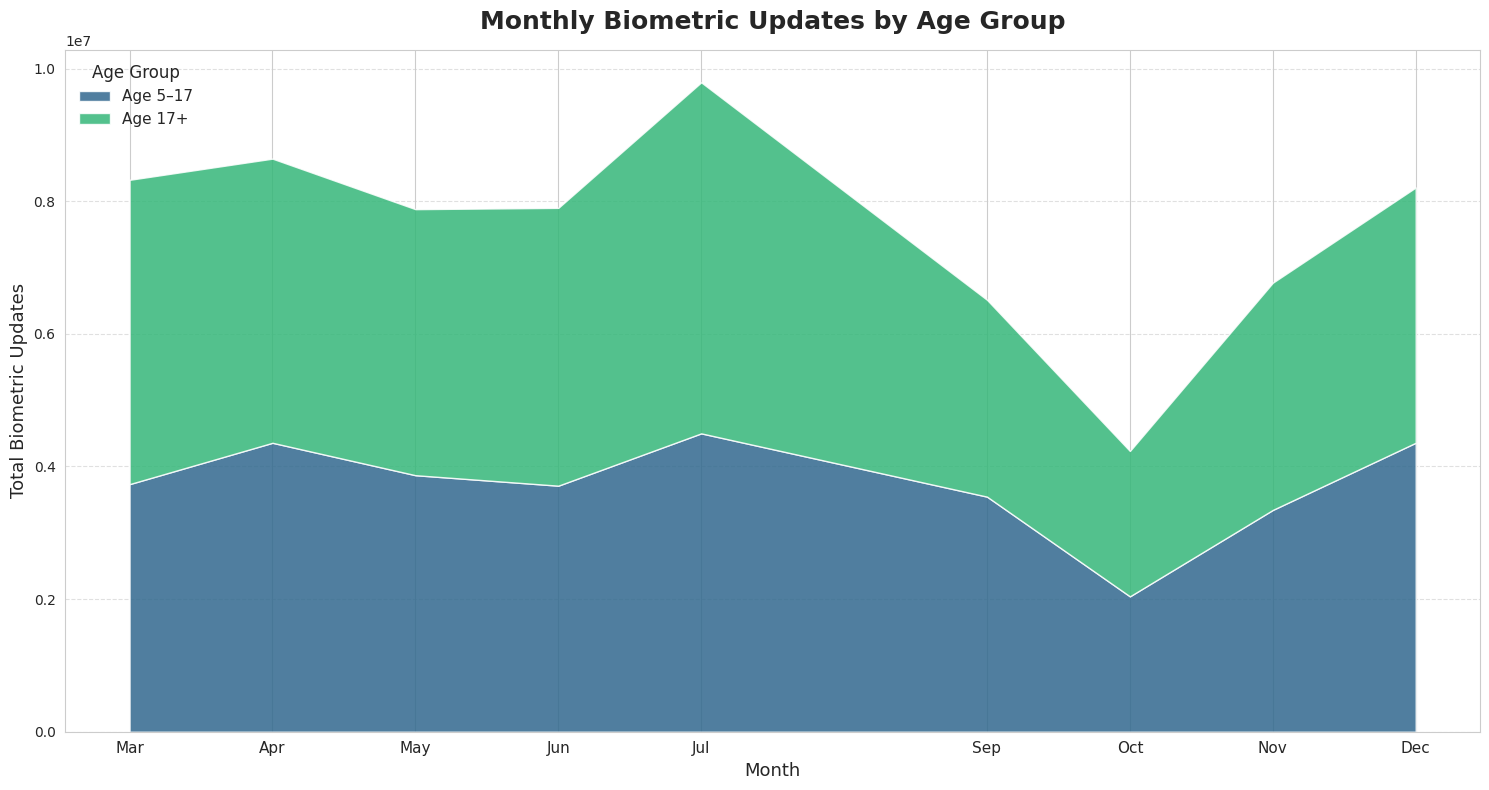

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


monthly_bio_age_groups = monthly_bio_age_groups.sort_values('month')


month_map = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

month_labels = [month_map[m] for m in monthly_bio_age_groups['month']]

plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")

plt.stackplot(
    monthly_bio_age_groups['month'],
    monthly_bio_age_groups['bio_age_5_17'],
    monthly_bio_age_groups['bio_age_17_'],
    labels=['Age 5–17', 'Age 17+'],
    alpha=0.85,
    colors=sns.color_palette("viridis", 2)
)

plt.title(
    'Monthly Biometric Updates by Age Group',
    fontsize=18,
    fontweight='bold',
    pad=15
)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Total Biometric Updates', fontsize=13)


plt.xticks(
    ticks=monthly_bio_age_groups['month'],
    labels=month_labels,
    fontsize=11
)

plt.legend(
    title='Age Group',
    title_fontsize=12,
    fontsize=11,
    loc='upper left',
    frameon=False
)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


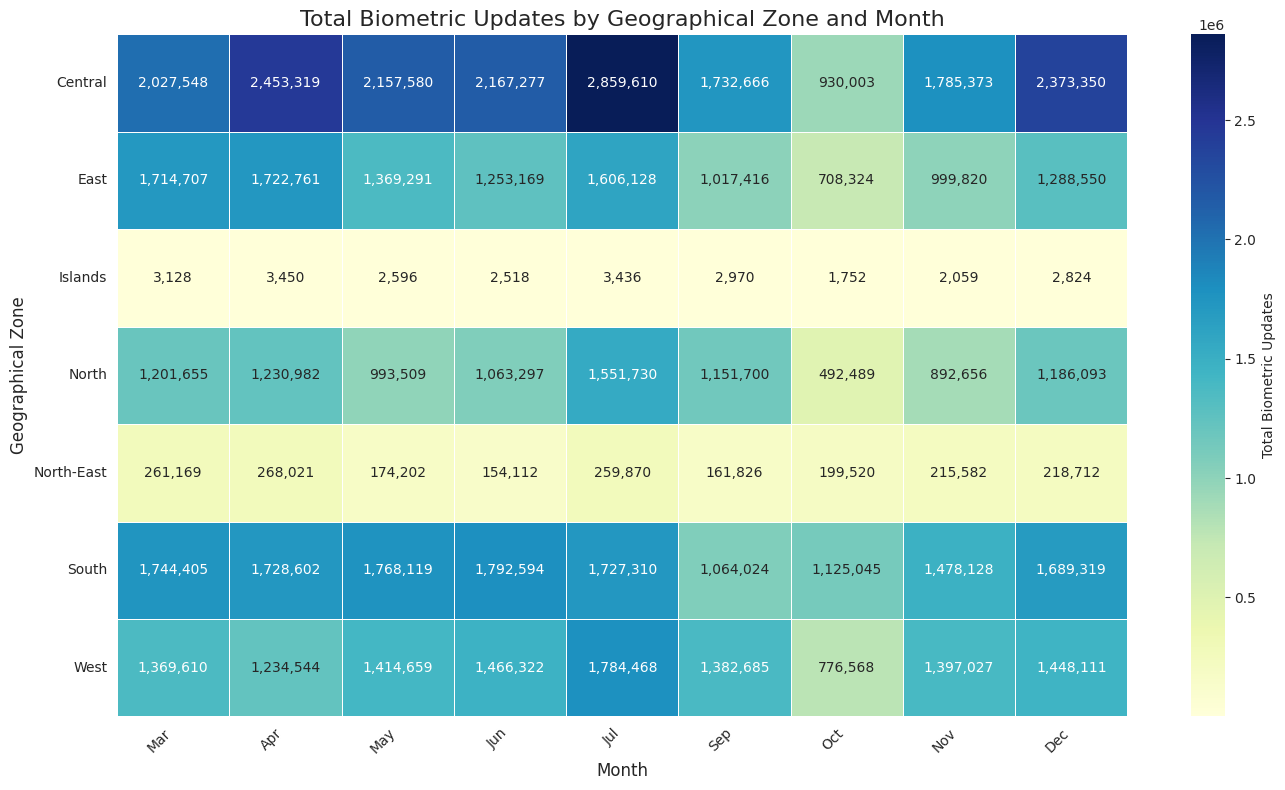

In [34]:

zone_month_enrollment = df.groupby(['geographical', 'month'])['total_bio_age'].sum().reset_index()


heatmap_data_zone_month = zone_month_enrollment.pivot(index='geographical', columns='month', values='total_bio_age')


month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

present_months = sorted(heatmap_data_zone_month.columns)
month_labels_filtered = [month_names[m-1] for m in present_months]

plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data_zone_month,
    annot=True,
    fmt=",.0f",
    cmap='YlGnBu',
    linewidths=.5,
    cbar_kws={'label': 'Total Biometric Updates'}
)

plt.title('Total Biometric Updates by Geographical Zone and Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Geographical Zone', fontsize=12)
plt.xticks(ticks=np.arange(len(month_labels_filtered)) + 0.5, labels=month_labels_filtered, rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()